In [19]:
import sys
import csv
import datetime
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import datetime
#import gender_guess.detector as gender
#from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline 

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
    genuine_users = pd.read_csv("users (3).csv")
    fake_users = pd.read_csv("fusers (3).csv")
    # print genuine_users.columns
    # print genuine_users.describe()
    #print fake_users.describe()
    X=pd.concat([genuine_users,fake_users])   
    y=len(fake_users)*[0] + len(genuine_users)*[1]

In [21]:
  genuine_users.shape

(1481, 34)

In [22]:
lang_list = list(enumerate(np.unique(X['lang'])))   
lang_dict = { name : i for i, name in lang_list }             
X.loc[:,'lang_code'] = X['lang'].map( lambda X: lang_dict[X]).astype(int)  
feature_columns_to_use = ['statuses_count','followers_count','friends_count','favourites_count','listed_count','lang_code']
X=X.loc[:,feature_columns_to_use]

In [23]:
X


,statuses_count,followers_count,friends_count,favourites_count,listed_count,lang_code
0,20370,5470,2385,145,52,5
1,3131,506,381,9,40,1
2,4024,264,87,323,16,1
3,40586,640,622,1118,32,1
4,2016,62,64,13,0,5
...,...,...,...,...,...,...
1332,1,0,17,0,0,1
1333,0,1,17,0,0,1
1334,2,0,15,0,0,1
1335,2,0,16,0,0,1


In [24]:
cats = X.select_dtypes(exclude=np.number).columns.tolist()
cats

[]

In [25]:
X.dtypes

statuses_count      int64
followers_count     int64
friends_count       int64
favourites_count    int64
listed_count        int64
lang_code           int32
dtype: object

In [26]:
for col in cats:
   X[col] = X[col].astype('category')

In [27]:
X.dtypes

statuses_count      int64
followers_count     int64
friends_count       int64
favourites_count    int64
listed_count        int64
lang_code           int32
dtype: object

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [30]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [31]:

preds = model.predict(dtest_reg)

In [32]:
preds

array([ 3.36788297e-02,  1.00064468e+00,  1.00077999e+00,  1.00062680e+00,
        1.00064468e+00,  6.07029349e-02,  9.99408960e-01, -5.14361188e-02,
        9.93922889e-01, -3.45964953e-02,  4.69851680e-03,  2.07720399e-01,
        9.05026961e-03,  6.00328863e-01, -6.23373426e-02,  1.00062680e+00,
        9.99428391e-01,  8.09995010e-02,  1.00105369e+00,  2.12455466e-02,
        5.43832362e-01,  1.00021183e+00,  4.67143655e-01,  1.00022972e+00,
        9.99691129e-01,  1.00021183e+00,  1.00064468e+00,  3.16106118e-02,
        3.21781030e-04,  2.89249122e-01,  4.29890513e-01,  2.15645805e-02,
        1.00064468e+00, -4.43838015e-02,  1.00064468e+00,  9.99691129e-01,
        1.00062680e+00,  3.06835860e-01, -9.79312882e-02,  1.00062680e+00,
        1.00062680e+00,  1.00141895e+00, -2.86630215e-03,  2.68480152e-01,
        1.00062680e+00,  6.65597990e-02,  9.96759057e-01,  8.89568776e-03,
        2.48253923e-02,  1.00064468e+00,  9.99691129e-01,  9.99691129e-01,
        8.53838027e-02,  

In [33]:
params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)

In [34]:
results.head

<bound method NDFrame.head of    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.373920        0.001345        0.383829       0.002439
1         0.289686        0.002438        0.311784       0.004108
2         0.234184        0.003205        0.270904       0.005658
3         0.199285        0.003480        0.248091       0.005765
4         0.175882        0.002798        0.237126       0.006264
5         0.161712        0.003584        0.232286       0.006888
6         0.152291        0.004539        0.228159       0.006809
7         0.145185        0.004365        0.227208       0.007351>

In [36]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [39]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [41]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [42]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.76%


In [43]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names=['Fake','Genuine']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

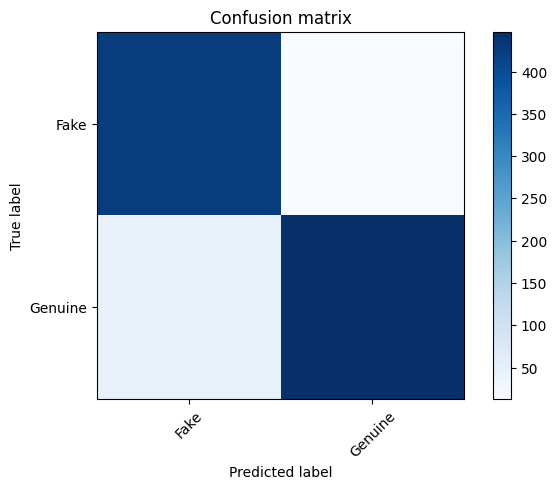

In [44]:
cm=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

In [45]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.90      0.97      0.94       438
     Genuine       0.97      0.91      0.94       492

    accuracy                           0.94       930
   macro avg       0.94      0.94      0.94       930
weighted avg       0.94      0.94      0.94       930



In [46]:
def plot_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

    print ("False Positive rate: ",false_positive_rate)
    print ("True Positive rate: ",true_positive_rate)


    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show() 

False Positive rate:  [0.         0.02968037 1.        ]
True Positive rate:  [0.         0.90853659 1.        ]


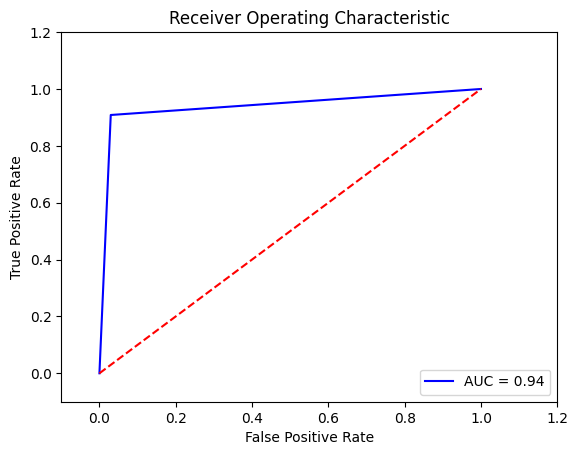

In [47]:
 plot_roc_curve(y_test, y_pred)